# t-distributed Stochastic Neighour Embedding(t-SNE)

Converting the MNIST dataset which is a popular supervised  handwritten digit dataset to an unsupervised setting using basic visualization(t-SNE)

### 1).Importing Modules

In [4]:
import matplotlib.pyplot as plt #used for plotting
import numpy as np             #to handle the numerical arrays
import pandas as pd            #used for plotting
import seaborn as sns          #used for plotting

In [5]:
#scikit-learn(sklearn) to get the data and perform t-SNE.
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

### 2).Loading MNSIT dataset using sklearn's built Function.

In [6]:
#skearn's built-in function that provide MNIST dataset 
data = datasets.fetch_openml("mnist_784",version = 1,return_X_y = True)

#pixel_values is a 2-dimensional array of shape 70000x784.
#target contain the number present in the image
pixel_values,target = data

#Converting target from string to int 
targets = target.astype(int)

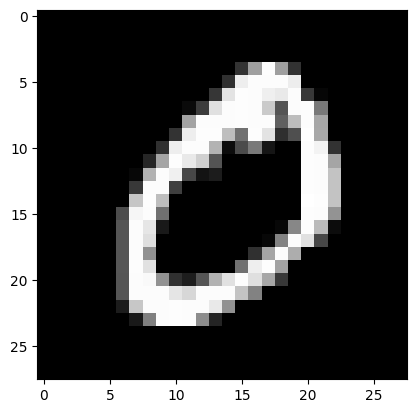

In [7]:
single_image = pixel_values.iloc[1, :].values.reshape(28, 28)


plt.imshow(single_image,cmap = "gray")

### 3).Creating t-SNE transformation of the data.

In [8]:
#using 2-components to vizualize the data in 2-dimension settings.
tsne = manifold.TSNE(n_components = 2,random_state = 42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

In [9]:
transformed_data.shape

(3000, 2)

In [10]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,targets[:3000])),
                      columns = ["x","y","targets"]
                      )

tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

In [11]:
print(tsne_df.head(10))

           x          y  targets
0  19.656628 -10.539068      5.0
1  56.072330  -1.059743      0.0
2  -1.406755 -54.425697      4.0
3 -40.433418  11.725303      1.0
4 -10.246605 -34.114712      9.0
5  -6.214513  26.387600      2.0
6 -26.693808  49.868206      1.0
7   7.647331  10.555026      3.0
8 -26.044743  44.544647      1.0
9 -14.170052 -17.212584      4.0


### 4).Displaying the final result.

c:\Users\98048\anaconda3\envs\py39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


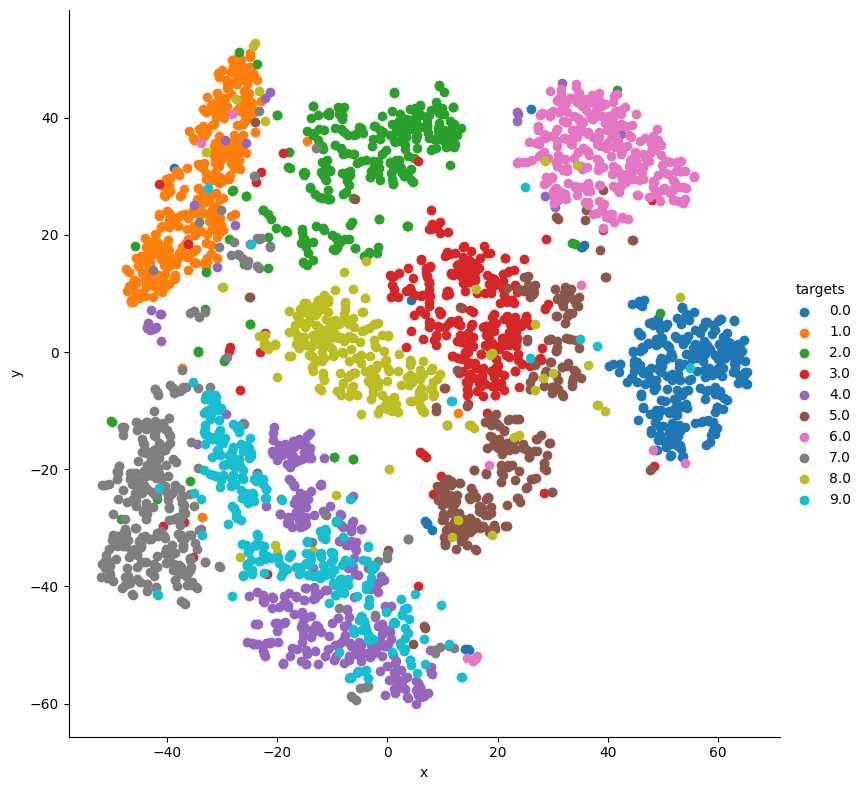

In [13]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)

grid.map(plt.scatter,"x","y").add_legend()

ShubhangiDabral13...